<a href="https://colab.research.google.com/github/Shashwat-143/Servo-Prediction-Using-Linear-Regression/blob/main/Servo_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Get Understanding about Data Set**

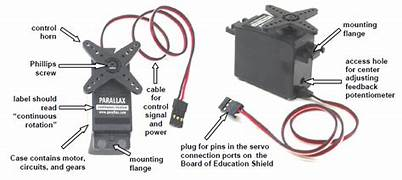

**What is Servo:** In control engineering a servomechanism, usually shortened to servo, is an automatic device that user error-ensing negative feedback to correct the action of a mechanism. On displacement-controlled applications, it usually includes a build-in encoder or other position feedback mechanism to ensure the output is achieving the desired effect. The term correctly applies only to systems where the feedback or error-correction signals help control mechanism position, speed, attitude or any other measurable variables. For examples, an automotive power window control is not a servomechanism, as there is no automatic feedback that controls position-the operator does this by observation. By contrast a car's cruise control user closed-loop feedback, which classifies it as a servomechanism.

A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is fom a simulation of a servo system involving a servo amplifier, a lead screw/nut, and a sliding carriage of some sort. It may have been on the translational axes of a robot on the 9th floor of the AI lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point. The variables that describe the data set and their values are the following:


1. Motor A,B,C,D,E
2. Screw A,B,C,D,E
3. Pgain 3,4,5,6
4. Vgain 1,2,3,4,5
5. Class 0.13 to 7.10

# **Import Library**

In [2]:
import pandas as pd

In [3]:
import numpy as np

# **Import CSV as DataFrame**

In [37]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Servo%20Mechanism.csv')

# **Get the First Five Rows of DataFrame**

In [5]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# **Get Information of DataFrame**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


# **Get the Summary Statistics**

In [7]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


#**Get Column Names**

In [8]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

#**Get Shape of DataFrame**

In [38]:
df.shape

(167, 5)

#**Get Categories and Counts of Categorical Variables**

In [39]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [11]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

In [12]:
df[['Pgain']].value_counts()

Pgain
4        66
3        50
5        26
6        25
dtype: int64

In [13]:
df[['Vgain']].value_counts()

Vgain
2        49
1        47
3        27
4        22
5        22
dtype: int64

In [14]:
df[['Class']].value_counts()

Class
11       14
12       11
9         9
13        8
20        7
6         6
8         6
41        5
3         5
4         5
44        5
35        4
34        4
45        4
27        4
26        4
7         4
42        3
30        3
19        3
43        3
21        3
22        3
23        3
37        3
2         3
18        3
5         2
46        2
17        2
29        2
25        2
24        2
16        2
28        2
47        1
49        1
50        1
48        1
1         1
40        1
39        1
38        1
36        1
33        1
32        1
31        1
15        1
14        1
10        1
51        1
dtype: int64

#**Get Encoding of Categorical Features**

In [15]:
df.replace({'Motor':{'A':0, 'B':1, 'C':2, 'D':3, 'E':4}},inplace=True)

In [16]:
df.replace({'Screw':{'A':0, 'B':1, 'C':2, 'D':3, 'E':4}},inplace=True)

#**Define y (dependent or label or target variable) and X (independent or features or attribute Variable)**

In [17]:
y = df['Class']

In [18]:
y.shape

(167,)

In [19]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [20]:
X = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [21]:
X.shape

(167, 4)

In [22]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


# **Get Train Test Split**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=2529)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

# **Get Model Train**

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

# **Get Model Prediction**

In [40]:
y_pred = lr.predict(X_test)

In [30]:
y_pred.shape

(51,)

In [31]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

# **Get Model Evaluation**

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
mean_squared_error(y_test, y_pred)

66.03589175595563

In [34]:
mean_absolute_error(y_test, y_pred)

7.190539677251235

In [35]:
r2_score(y_test, y_pred)

0.6807245170563927

# **Get Visualization of Actual Vs Predicted Results**

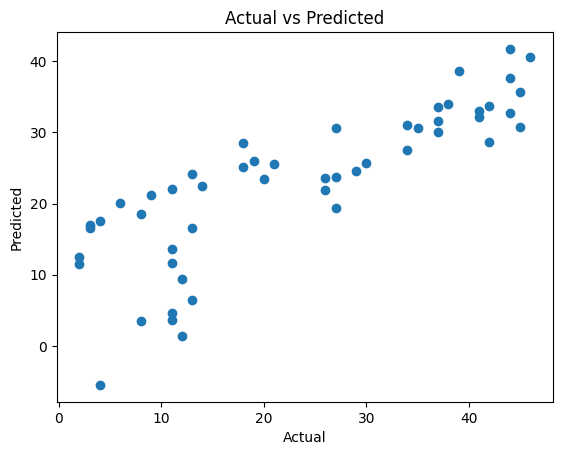

In [36]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()